In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os

In [3]:
wine = pd.read_csv('..\\Udemy Data Science Bootcamp\winequality-red.csv')
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [5]:
wine.shape

(1599, 12)

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
wine.duplicated().sum()

240

In [13]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [16]:
wine.columns = wine.columns.str.replace(" ", "_")

<AxesSubplot:>

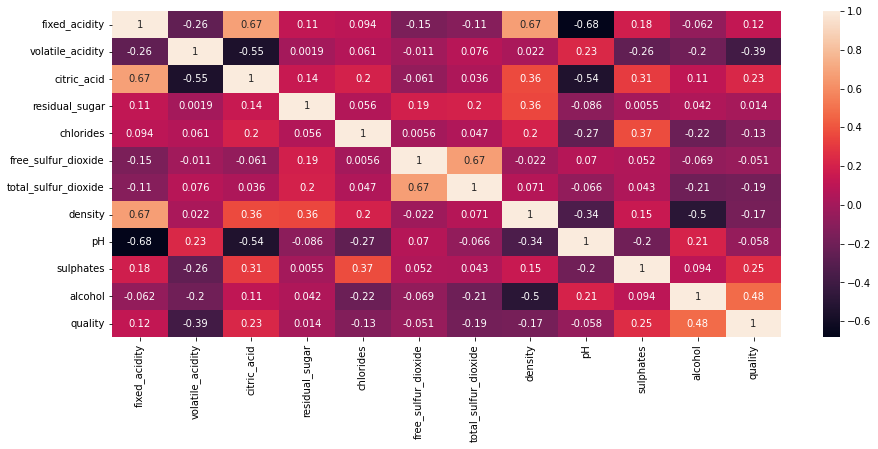

In [36]:
plt.figure(figsize=(15, 6))
sns.heatmap(wine.corr(), annot=True)

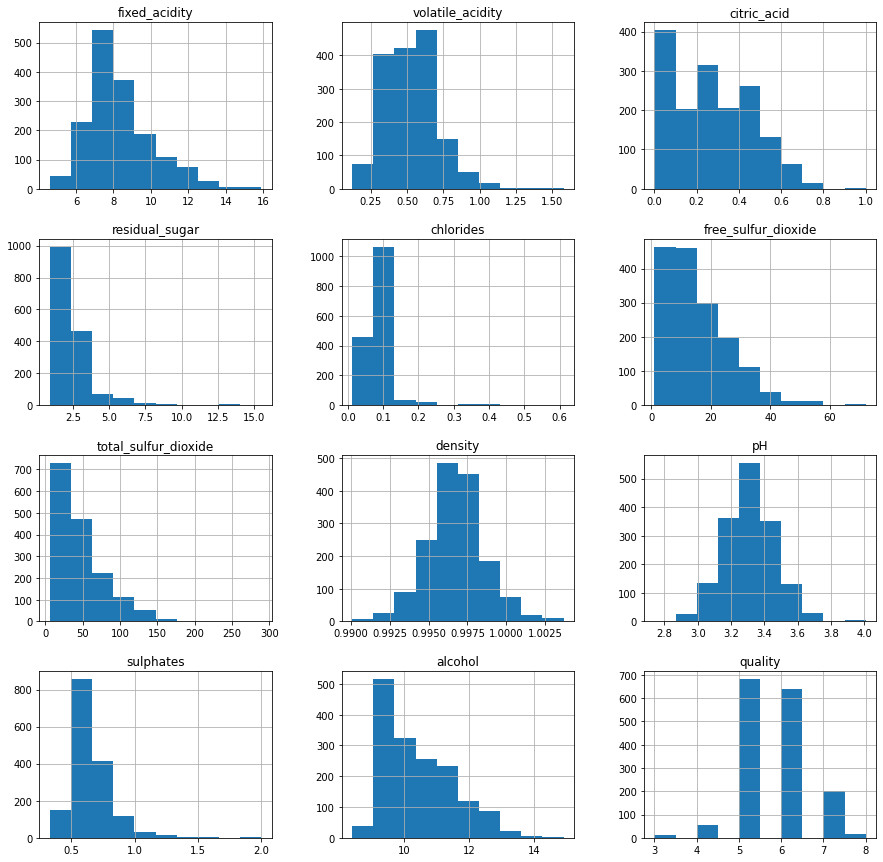

In [19]:
wine.hist(figsize=(15, 15));

<AxesSubplot:>

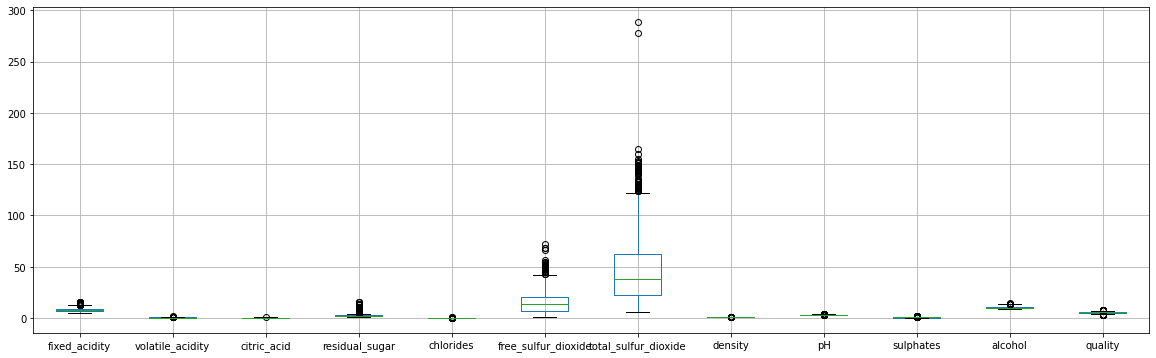

In [34]:
wine.boxplot(figsize=(20, 6))

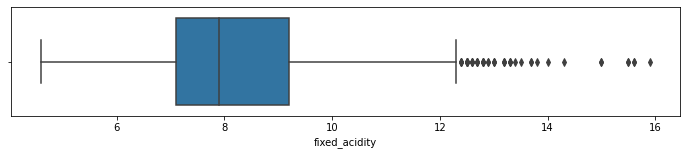

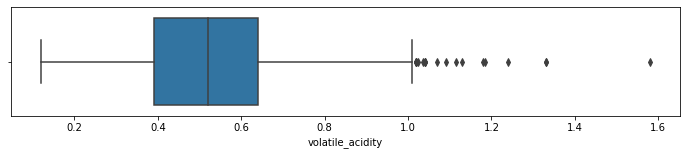

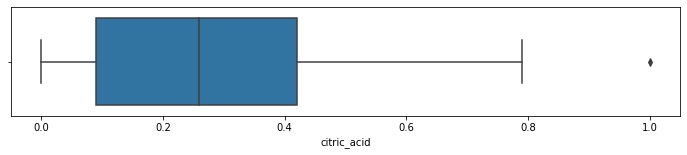

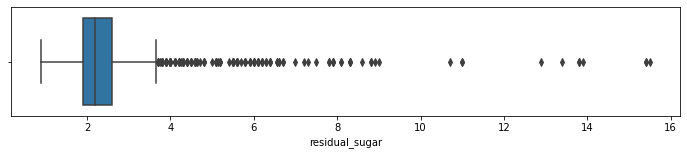

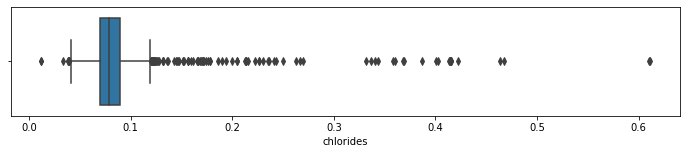

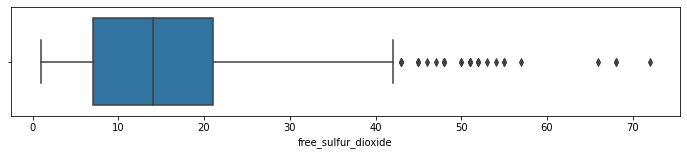

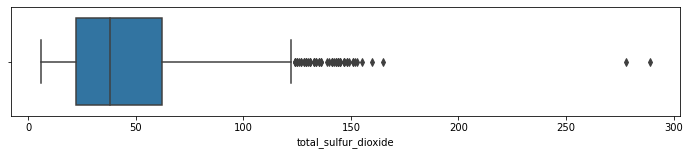

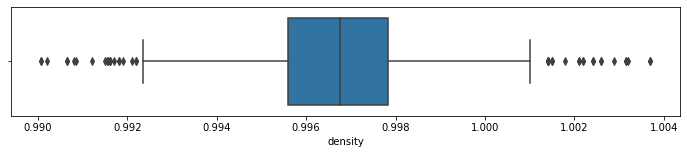

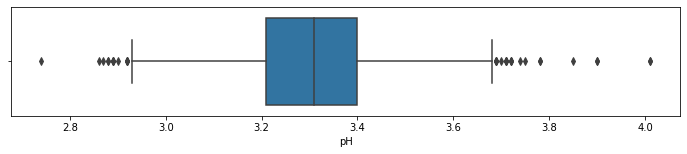

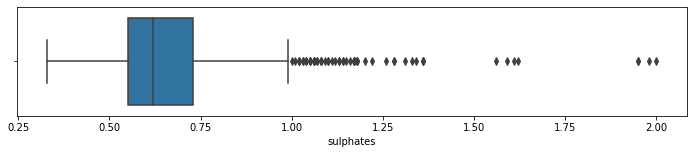

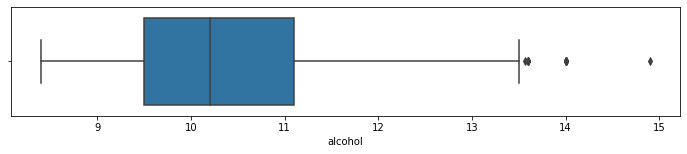

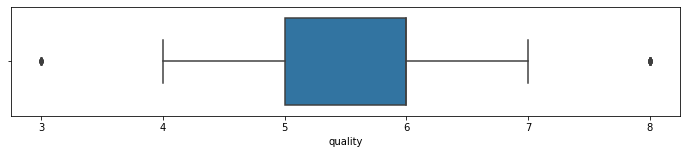

In [31]:
for i, col in enumerate(wine.columns): 
    plt.figure(i, figsize=(12, 2))
    sns.boxplot(data=wine, x=wine[col])

In [45]:
print("Correlation between wine quality and alochol content: {}".format(np.round(wine['quality'].corr(wine['alcohol']),2)))

Correlation between wine quality and alochol content: 0.48


<AxesSubplot:>

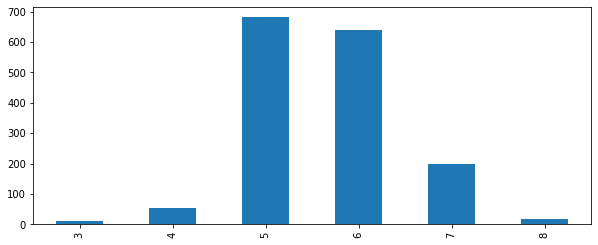

In [54]:
wine.quality.value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10, 4))
# 6-8 will be considered "good wines"
# anything lower will be considered "bad quality"


In [55]:
def classify_wine_quality(x): 
    if x > 6: 
        return 1
    else: 
        return 0
    

wine['wine_quality'] = wine['quality'].apply(lambda x: classify_wine_quality(x))

In [59]:
wine.wine_quality.value_counts()

0    1382
1     217
Name: wine_quality, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, plot_confusion_matrix 

In [63]:
wine.columns
wine.drop(columns='quality', inplace=True)

In [64]:
X = wine.drop('wine_quality', axis=1)
y = wine['wine_quality']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
logr = LogisticRegression() 

In [69]:
logr.fit(X_train, y_train)

c:\users\ana jones\pycharmprojects\jupyter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
log_predictions = logr.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       451
           1       0.63      0.22      0.33        77

    accuracy                           0.87       528
   macro avg       0.75      0.60      0.63       528
weighted avg       0.84      0.87      0.84       528





c:\users\ana jones\pycharmprojects\jupyter\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


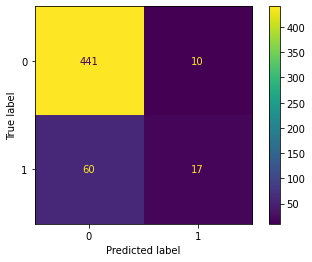

In [72]:
print(classification_report(y_test, log_predictions))
print('\n')
print(plot_confusion_matrix(logr, X_test, y_test))

In [73]:
from sklearn.metrics import accuracy_score

In [75]:
print(f"Accuracy of Logistic Model is: {np.round(accuracy_score(log_predictions, y_test), 2) * 100}%")

Accuracy of Logistic Model is: 87.0%


In [76]:
from scipy.stats import zscore

In [77]:
df = wine.copy()

In [78]:
df = df[(np.abs(zscore(df)) < 3).all(axis=1)]

In [84]:
Xn = df.drop('wine_quality', axis=1)
yn = df['wine_quality']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.33, random_state=42)

In [86]:
n_logr = LogisticRegression()

In [87]:
n_logr.fit(X_train, y_train)

c:\users\ana jones\pycharmprojects\jupyter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
n_log_predictions = n_logr.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       413
           1       0.77      0.29      0.42        69

    accuracy                           0.89       482
   macro avg       0.83      0.64      0.68       482
weighted avg       0.87      0.89      0.86       482





c:\users\ana jones\pycharmprojects\jupyter\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


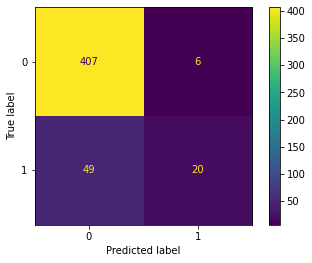

In [89]:
print(classification_report(y_test, n_log_predictions))
print("\n")
print(plot_confusion_matrix(n_logr, X_test, y_test))

In [90]:
print(f"Accuracy report with outliers removed: {np.round(accuracy_score(n_log_predictions, y_test),2 )* 100}%")

Accuracy report with outliers removed: 89.0%
